## Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel $\rightarrow$ Restart) and then **run all cells** (in the menubar, select Cell $\rightarrow$ Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Mohammed Salama"
COLLABORATORS = ""

---

## <font color="brown">Data Management for Data Science</font>
## <font color="brown">Lab 03: Data Collection and Transformation </font>
## <font color="brown">Due Date : October 27, 2024 11.59PM </font>
You can still submit 48 hours late. But you will only have 4 total late days for all assignments, max 2 late days per assignment. We will not grade any lab submitted 48 hours after the due date. Additional late days over 4 will be penalized at 0.5% per day from lab percentage.

<div class="alert alert-block alert-info">
<h3>Student Information</h3> Please provide information about yourself.<br>
<b>Name</b>: Mohammed Salama<br> 
<b>NetID</b>: mhs170<br>
<b>Recitation #</b>: 02<br>
<b>Notes to Grader</b> (optional): I left task 3.1 empty because I already used pivot to help me plot the data in 2.4. And for task 3.2, I wrote my own answer because I wasn't sure if I would get points taken off for leaving the default answer. In task 2.2, I went ahead and also fixed the format of Sales column because mine wasn't the same as the sample output uploaded by the professor<br>
<br><br>
<b>IMPORTANT</b>
Your work will not be graded withour your initials below<br>
I certify that this lab represents my own work and I have read the RU academic intergrity policies at<br>
<a href="https://studentconduct.rutgers.edu/processes/academic-integrity">https://www.cs.rutgers.edu/academic-integrity/introduction </a><br>
<b>Initials</b>: MS    (eg: AG for Andy Guna)

## Important
We will post any updates to this assignment on piazza. if you need clarifications, please post on piazza. We will cover some of the things needed in the recitations and lectures. 

# Problem 1 - Reading and Cleaning Data (40 points)
Reading and cleaning datasets is a crucial skill in data science, essential for ensuring that the data is accurate, consistent, and ready for analysis. The process begins by importing the dataset into a suitable environment, such as Python using libraries like Pandas. Properly loading the data allows for an initial inspection where data types, missing values, and inconsistencies are identified. At this stage, data cleaning takes place, which includes handling null values, correcting data types, removing duplicates, and standardizing formats. This ensures the data is reliable and suitable for analysis. By following a structured approach, the raw dataset is transformed into a clean, high-quality dataset, laying the foundation for accurate and meaningful analysis.

In this problem, we will read a file of product data and clean it. Please follow the instructions in the task statement and the comment in each cell.

### Task 1.1 - Read the data file
The data file given at **/srv/shared/sales_data_updated.csv** contains data on product sales. Specifically, this table contains the sales data for regions and products. You can find out how many regions and how many products are covered in the data set by finding nuniques in those columns. First few records of the data file should look like this.

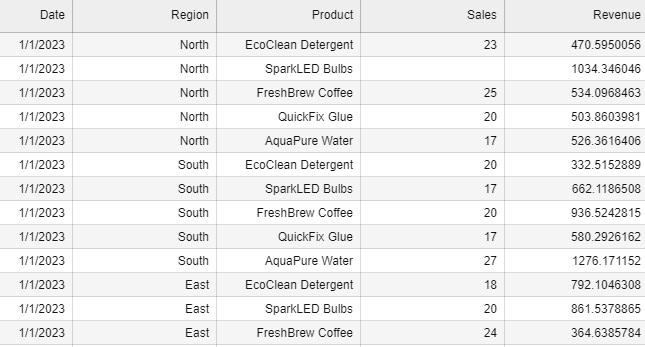

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('/srv/shared/sales_data_updated.csv')

## print the first 20 lines of the new file to show that file has been properly read.
df.head(20)



,Date,Region,Product,Sales,Revenue
0,1/1/2023,North,EcoClean Detergent,23.0,470.5950056
1,1/1/2023,North,SparkLED Bulbs,NaN,1034.346046
2,1/1/2023,North,FreshBrew Coffee,25.0,534.0968463
3,1/1/2023,North,QuickFix Glue,20.0,503.8603981
4,1/1/2023,North,AquaPure Water,17.0,526.3616406
5,1/1/2023,South,EcoClean Detergent,20.0,332.5152889
6,1/1/2023,South,SparkLED Bulbs,17.0,662.1186508
7,1/1/2023,South,FreshBrew Coffee,20.0,936.5242815
8,1/1/2023,South,QuickFix Glue,17.0,580.2926162
9,1/1/2023,South,AquaPure Water,27.0,1276.171152


### Task 1.2.1 - Finding Missing Values
Finding missing values in a dataset is crucial because they can significantly impact the quality and accuracy of data analysis. Missing values can distort statistical calculations, lead to biased results, and affect the performance of machine learning models. Understanding where and why data is missing helps in deciding how to handle these gaps effectively, whether by imputing values, removing incomplete entries, or using algorithms that can manage missing data. Addressing missing values ensures the analysis remains reliable and that conclusions drawn from the data are well-founded, preventing misleading insights and incorrect decisions.

Write code to find the amount and the data types of the missing values in each column and **state the percentage** of missing values for each of the columns.

In [3]:
## write your code here

missing_region = df['Region'].isnull().sum()
missing_date = df['Date'].isnull().sum()
missing_product = df['Product'].isnull().sum()
missing_sales = df['Sales'].isnull().sum()
missing_revenue = df['Revenue'].isnull().sum()

numRows = df.shape[0]

region_pct = (missing_region / numRows) * 100
date_pct = (missing_date / numRows) * 100
product_pct = (missing_product / numRows) * 100
sales_pct = (missing_sales / numRows) * 100
revenue_pct = (missing_revenue / numRows) * 100


print(f'Missing values in Region: {missing_region} cells or {region_pct}%\nRegion data type: {df.dtypes['Region']}')
print(f'Missing values in Date: {missing_date} cells or {date_pct}%\nDate data type: {df.dtypes['Date']}')
print(f'Missing values in Product: {missing_product} cells or {product_pct}%\nProduct data type: {df.dtypes['Product']}')
print(f'Missing values in Sales: {missing_sales} cells or {sales_pct}%\nSales data type: {df.dtypes['Sales']}')
print(f'Missing values in Revenue: {missing_revenue} cells or {revenue_pct}%\nRevenue data type: {df.dtypes['Revenue']}')

Missing values in Region: 161 cells or 2.199453551912568%
Region data type: object
Missing values in Date: 0 cells or 0.0%
Date data type: object
Missing values in Product: 138 cells or 1.8852459016393444%
Product data type: object
Missing values in Sales: 487 cells or 6.653005464480874%
Sales data type: object
Missing values in Revenue: 340 cells or 4.644808743169399%
Revenue data type: object


## Your Analysis 
Based on what you observe, what should we do about the missing values? Justify your statements. This should be less than 200 words.  

Based on what I observe, we should replace missing values in 'Region' and 'Product' with the mode of the columns, respectively. This is because missing values only account for a very small percentage of the total data, therefore there won't be any meaningful changes in data trends

### Task 1.2.2 - Finding Bad Records

Finding bad records in a dataset is essential because they can compromise the accuracy and integrity of data analysis. Bad records, which include invalid values, incorrect data types, or incorrectly recorded information, can lead to skewed statistical results, misinform machine learning models, and result in flawed interpretations. Identifying and understanding these bad records helps in deciding whether to correct, filter, or remove them, ensuring the dataset remains clean and trustworthy. Addressing bad records ensures the quality of analysis and supports making data-driven decisions with confidence, avoiding misleading conclusions. 

Write code to identify the **unique values, number and percentage of bad records** in column "Region" and "Product". Note that bad records are different from missing values which is "nan".

In [4]:
# find the unique types of bad records for column 'Region' and 'Product'

unique_region = df.Region.unique()
unique_product = df.Product.unique()

print(f"Unique values in 'Region': {unique_region}")
print(f"Unique values in 'Product': {unique_product}")

Unique values in 'Region': ['North' 'South' 'East' 'West' nan '???' 'junk_value' '###']
Unique values in 'Product': ['EcoClean Detergent' 'SparkLED Bulbs' 'FreshBrew Coffee' 'QuickFix Glue'
 'AquaPure Water' '???' nan '###' 'junk_value']


In [5]:
# indentiyf the number and proportion of bad records in column 'Region' and 'Revenue'

invalid_data_region = ['???', 'junk_value', '###']
invalid_data_product = ['???', 'junk_value', '###']

region_bad_records_count = (df['Region'].isin(invalid_data_region))
sum_region = region_bad_records_count.sum()

product_bad_records_count = (df['Product'].isin(invalid_data_product))
sum_product = product_bad_records_count.sum()

print(f"Number of bad records in 'Region': {sum_region} or {(sum_region/numRows) * 100}%")
print(f"Number of bad records in 'Product': {sum_product} or {(sum_product/numRows) * 100}%")

Number of bad records in 'Region': 205 or 2.800546448087432%
Number of bad records in 'Product': 228 or 3.114754098360656%


### Task 1.3 - Cleaning Strategy for Missing Values and Bad Records
List the steps you would take to clean this data. Cleaning data involves **inferring/replacing** missing data and/or **removing** bad data records. Justify all your statements based on the observations you make. You goal is to keep as much data records as possible. Clearly justify your answers by explaining why you want to infer or replace data as well as remove them. Keep in mind that you should not remove any data unless there is no way to use that data.

Steps I would take to clean this data:

1. Drop rows with missing values in each column, these rows serve no purpose to us
2. Delete duplicate rows, these rows make our data redundant
3. Missing values and bad records - replace with mode or average depending on if the column's data type is numerical or categorical. I don't want to drop rows with bad or missing data becasue it may be misleading.

### Task 1.4 - Implement Your Missing Values and Bad Records Stratgey
What is your best strategy for missing values and dealing with bad records? Implement it here and show the new data frame where there should not be any missing values. Write assert statements to justify.

**hint:** `df['column_name'] = df['column_name'].replace(a_list_of_invalid_values, np.nan)` performs a replacement of specific invalid values in the specified column with NaN.

In [6]:
# ['???', 'junk_value', '###']

#df['Date'] = pd.to_datetime(df['Date'])

In [7]:
## write your code here
new_df = df.copy()

new_df.drop_duplicates()
new_df.dropna(how="all")

most_occuring_region = new_df['Region'].value_counts().idxmax()
most_occuring_product = new_df['Product'].value_counts().idxmax()

new_df['Sales'] = pd.to_numeric(new_df['Sales'], errors='coerce')
average_sales = new_df['Sales'].mean()

new_df['Revenue'] = pd.to_numeric(new_df['Revenue'], errors='coerce')
average_revenue = new_df['Revenue'].mean()

# replace invalid and empty data in Region and Prodict with mode
new_df['Region'] = new_df['Region'].replace(invalid_data_region, most_occuring_region)
new_df['Product'] = new_df['Product'].replace(invalid_data_product, most_occuring_product)

new_df['Region'] = new_df['Region'].fillna(most_occuring_region)
new_df['Product'] = new_df['Product'].fillna(most_occuring_product)

# replace invalid and empty data in Revenue and sales

new_df['Revenue'] = new_df['Revenue'].fillna(average_revenue)
new_df['Sales'] = new_df['Sales'].fillna(average_sales)


### Task 1.5 - Assert 
Assert that the data set is now clean. There are no bad records or missing values. You need to write assert statements to do this. How did the size of the data changed. What percentage of the data was removed from the original data. 

In [8]:
## write your code here

assert new_df.isnull().sum().sum() == 0, "There are missing values in new_df"

invalid_data = ['???', '###', 'junk_value']

assert not new_df.isin(invalid_data).any().any(), "There are invalid values in new_df"


print(f"Old dataframe number of rows: {df.shape[0]}")
print(f"New dataframe number of rows: {new_df.shape[0]}")
print("No data was removed")

Old dataframe number of rows: 7320
New dataframe number of rows: 7320
No data was removed


# Problem 2 - Data Analyzing and Visualization (30 points)

Data analysis is a critical step in extracting insights from cleaned datasets. After the data has been properly preprocessed, the next step involves applying various analytical techniques to uncover patterns, trends, and relationships within the data. This can include calculating descriptive statistics, visualizing data distributions, exploring correlations, and identifying potential outliers. Effective analysis helps in drawing meaningful conclusions, which can be used to inform decisions or drive further exploration.

In this problem, we will use the cleaned product data from Problem 1 to perform a detailed analysis. You will calculate summary statistics, create visualizations, and explore relationships between different variables to gain deeper insights into the dataset. Follow the instructions provided in each task to guide your analysis.

### Task 2.1 - Finding Outliers
Data outliers are values in a dataset that deviate significantly from the rest of the data points. They are unusually high or low values that do not fit the expected pattern or distribution, often caused by variability in the data, measurement errors, or experimental anomalies. Detecting and addressing outliers is important because they can skew statistical analyses, distort model predictions, and lead to misleading conclusions if not properly handled.

There are some outliers in this data set. Find them, list them and remove them from the data set. What percentage of the data contained outliers?

In [9]:
## write your code here

import numpy as np
from scipy import stats

number_rows_before_removing = new_df.shape[0]

z_score_sales = np.abs(stats.zscore(new_df['Sales']))

threshold = 3
outliers_sales = new_df['Sales'][z_score_sales > threshold]

print(f'Outliers in sales:\n{outliers_sales}')

z_score_revenue = np.abs(stats.zscore(new_df['Revenue']))

outliers_revenue = new_df['Revenue'][z_score_revenue > threshold]

print(f'Outliers in revenue:\n{outliers_revenue}')

rows_with_outliers = (z_score_sales > threshold) | (z_score_revenue > threshold)

Outliers in sales:
250     33.0
592     33.0
712     35.0
1184    33.0
1952    34.0
2018     7.0
2444    35.0
2556    34.0
2616    33.0
2627    34.0
2674    33.0
3036     7.0
3055     7.0
3167     7.0
3426    35.0
3845     7.0
3999    33.0
4127    40.0
4220    33.0
4222    36.0
4731    36.0
4784    37.0
4830     5.0
5201    33.0
5225    37.0
6134    37.0
6248     6.0
6857    37.0
7066    34.0
7089    35.0
7122    36.0
7212    34.0
7251    34.0
7299    34.0
Name: Sales, dtype: float64
Outliers in revenue:
64      1410.608422
257     1546.029200
769     1403.884418
867     1397.715200
1527    1475.715528
1735    1430.083986
1997    1399.679741
2103    1402.475201
2193    1414.732055
2273    1402.393376
2544    1414.869534
2616    1593.509735
2940    1394.180744
3070    1438.773669
3424    1438.613058
3463    1444.977530
3620    1404.268575
3969    1390.704813
4127    1487.667727
4220    1537.585202
4353    1502.901281
4401    1489.362440
4561    1426.493892
4786    1583.846727
5837    15

In [10]:
new_df2 = new_df[~rows_with_outliers].copy()

number_rows_after_removing = new_df2.shape[0]

num_outliers = number_rows_before_removing - number_rows_after_removing
print(f"Percentage of data that contained outliers: {(num_outliers / number_rows_before_removing) * 100}%")

Percentage of data that contained outliers: 0.8469945355191256%


### Task 2.2 - Finding Revenue from each Product
First fix the Revenue Column by making revenue numbers only listed up to 2 decimal points. The new dataframe should reflect that. Find the total revenue from each product.



In [11]:
## write your code here

new_df2['Revenue'] = new_df2['Revenue'].apply(lambda x: f"{x:.2f}")

new_df2['Sales'] = new_df2['Sales'].apply(lambda x: f"{x:.1f}")

In [12]:
new_df2['Revenue'] = new_df2['Revenue'].astype(float)
new_df2['Sales'] = new_df2['Sales'].astype(float)

In [13]:
valid_products = ['EcoClean Detergent', 'SparkLED Bulbs', 'FreshBrew Coffee', 'QuickFix Glue', 'AquaPure Water']
product_revenue = new_df2.groupby('Product')['Revenue'].sum()
product_revenue

Product
AquaPure Water         894622.06
EcoClean Detergent    1133287.06
FreshBrew Coffee       877942.52
QuickFix Glue          886327.72
SparkLED Bulbs         907485.25
Name: Revenue, dtype: float64

#### Summarize
Based on observations above, what is the product with the highest revenue, lowest revenue and median revenue.

The product with the highest revenue is 'EcoClean Detergent', the lowest revenue is 'FreshBrew Coffee', and the median revenue is 'AquaPure Water'.

### Task 2.3 - Find the Best Product by Region
Finding the best product by region is essential because it helps businesses understand local customer preferences and tailor their marketing strategies accordingly. It enables companies to allocate resources efficiently, focusing on high-demand products in specific areas to maximize sales and revenue. This regional insight also supports inventory management, reducing overstock or shortages by aligning supply with the actual needs of each market.

One business strategy may be to find the best product for each region, so it can be expanded. Write code to find the best product from each region and save it in a csv file. 

In [14]:
## write your code here

most_sold_products = new_df2.groupby(['Region', 'Product'])['Revenue'].sum().reset_index()
best_selling_by_region = most_sold_products.loc[most_sold_products.groupby('Region')['Revenue'].idxmax()]
best_selling_by_region.to_csv('best_selling_by_region.csv')
best_selling_by_region

,Region,Product,Revenue
1,East,EcoClean Detergent,314072.67
6,North,EcoClean Detergent,276929.48
11,South,EcoClean Detergent,259504.85
16,West,EcoClean Detergent,282780.06


### Task 2.4 - Plotting Data by Region and Product
In this task we will plot the data to compare revenue from each product based on region. 
Read documentation on plotting 
<a href="https://matplotlib.org/">https://matplotlib.org/</a>
to determine the best plot to use. Your plot should clearly demonstrate the relation between region and product. Please utilize the result you obtained in Task 2.3

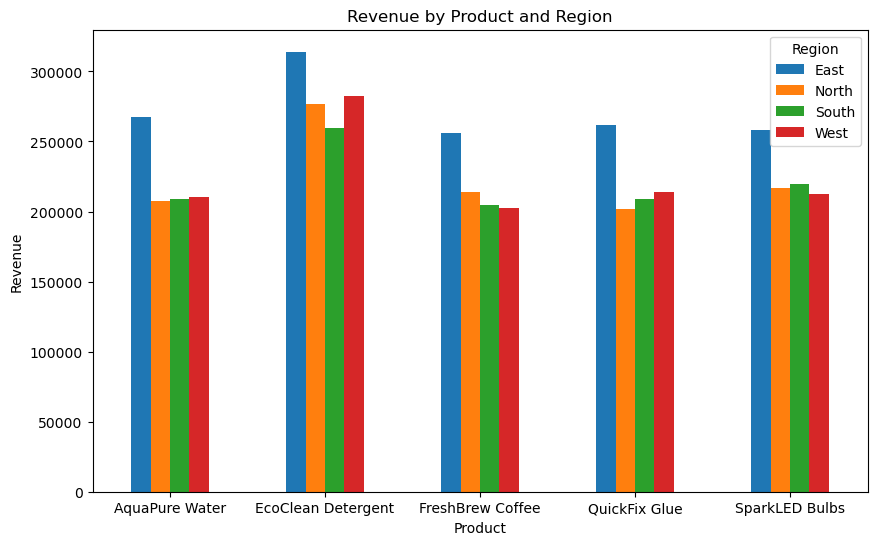

In [15]:
## write your code here

import matplotlib.pyplot as plt

pivot_df = most_sold_products.pivot(index='Product', columns='Region', values='Revenue')

# Plot
pivot_df.plot(kind='bar', figsize=(10, 6))
plt.title('Revenue by Product and Region')
plt.xlabel('Product')
plt.ylabel('Revenue')
plt.xticks(rotation=0)
plt.legend(title='Region')
plt.show()

# Problem 3 - Data Transformation (30 points)
Transforming data from one format to another is important because it makes the data more suitable for analysis, ensuring it aligns with the requirements of specific tools and algorithms. It allows for easier integration and comparison of datasets, enabling more accurate insights across different data sources. Data transformation also helps in extracting meaningful patterns by reshaping the data into formats that highlight key trends and relationships, enhancing the overall analysis.

### Task 3.1 - Pivot the Data Set
Pivoting is a data transformation technique used to reshape data by converting unique values from one column into multiple columns. In this process, the data is reorganized to create a new table where rows become columns, making it easier to analyze trends or comparisons within the dataset. Pivoting is often used to summarize data, allowing for a clearer view of relationships and patterns by grouping and aggregating values.

Using the pivoting methods discussed in class, convert this data set from a long format to wide format. Continue to use the dataframe you obtained in Task 2.3

In [16]:
## write your code here

pivot_df

Region,East,North,South,West
Product,,,,
AquaPure Water,267554.47,207507.09,208936.78,210623.72
EcoClean Detergent,314072.67,276929.48,259504.85,282780.06
FreshBrew Coffee,255983.81,214264.48,204913.07,202781.16
QuickFix Glue,262053.90,201788.29,208760.06,213725.47
SparkLED Bulbs,258223.87,216659.50,219938.79,212663.09


### Task 3.2 - Using the Pivoted Data Set
Explain the advantages of having the pivoted data set instead of the original? Explain below.

Having a pivoted dataset offers the benefit of simplifying the comparison of revenue for various products across different regions. This format presents the revenue for each product in each region side by side, making it easier to identify the best-selling product in each region and compare the revenue of different products across all regions.

### Task 3.3 - One Hot Encoding
One-hot encoding is a technique used to convert categorical data into a numerical format that machine learning algorithms can easily process. It creates a binary column for each category in the dataset, assigning a value of 1 to indicate the presence of that category and 0 otherwise. This transformation helps ensure that the model does not assume any inherent order or priority among the categorical values, treating them as distinct and equally important features.

For analysis, convert the categorical data to numerical data. You need to use one-hot encoding to do this. Display the new data frame after converting using one-hot encoding. This data frame should have only numerical values. 

In [17]:
## write your code here

from sklearn.preprocessing import OneHotEncoder

# encode region and product

new_df2.reset_index(drop=True, inplace=True)

columns_to_encode = ['Region', 'Product']

encoder = OneHotEncoder(sparse_output=False)
encoded = encoder.fit_transform(new_df2[columns_to_encode]) # encoded_data
onehot_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(columns_to_encode)) # encoded_df

df_encoded = pd.concat([new_df2.drop(columns_to_encode, axis=1), onehot_df], axis=1)

print(df_encoded)

          Date  Sales  Revenue  Region_East  Region_North  Region_South  \
0     1/1/2023   23.0   470.60          0.0           1.0           0.0   
1     1/1/2023   20.1  1034.35          0.0           1.0           0.0   
2     1/1/2023   25.0   534.10          0.0           1.0           0.0   
3     1/1/2023   20.0   503.86          0.0           1.0           0.0   
4     1/1/2023   17.0   526.36          0.0           1.0           0.0   
...        ...    ...      ...          ...           ...           ...   
7253  1/1/2024   20.1   179.00          0.0           0.0           0.0   
7254  1/1/2024   21.0   380.00          0.0           0.0           0.0   
7255  1/1/2024   19.0   713.34          0.0           0.0           0.0   
7256  1/1/2024   21.0   507.94          0.0           0.0           0.0   
7257  1/1/2024   20.1   543.43          0.0           0.0           0.0   

      Region_West  Product_AquaPure Water  Product_EcoClean Detergent  \
0             0.0         

### Task 3.4 - Prediction Model using Linear Regression
A prediction model using linear regression aims to find the best linear relationship between a dependent variable (the outcome) and one or more independent variables (predictors). The model represents this relationship 


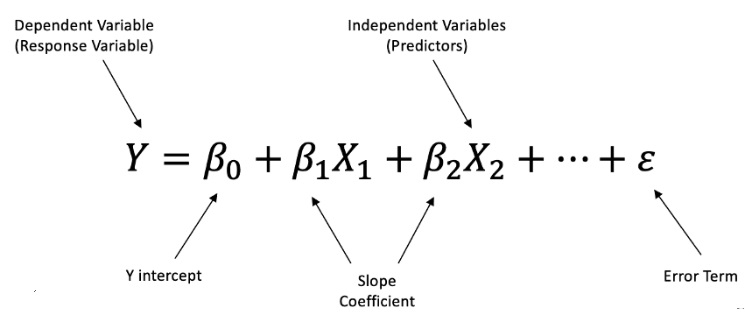


The goal is to adjust beta coefficients so that the predicted values are as close as possible to the actual data points, minimizing the error between the predictions and real observations, allowing the model to forecast future values based on the learned relationship.

In this task, you will train a prediction model, using library functions.  to predict the sales given region and product. You are allowed to use the built functions in existing python libraries for implementation. 

First create and train a prediction model.

In [18]:
## write your code here
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df_encoded[['Region_East', 'Region_North', 'Region_South',
                'Product_AquaPure Water', 'Product_EcoClean Detergent', 
                'Product_FreshBrew Coffee', 'Product_QuickFix Glue']]
y = df_encoded['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

### Task 3.5 - Predict
Based on the prediction model, predict the sales for the following test case.

```
test_case = [
    ('North', 'SparkLED Bulbs'),
    ('East', 'FreshBrew Coffee'),
    ('West', 'EcoClean Detergent'),
    ('South', 'AquaPure Water'),
    ('South', 'QuickFix Glue')
]
```

In [19]:
## write your code here

test_case = [
    ('North', 'SparkLED Bulbs'),
    ('East', 'FreshBrew Coffee'),
    ('West', 'EcoClean Detergent'),
    ('South', 'AquaPure Water'),
    ('South', 'QuickFix Glue')
]

# Create a DataFrame for test cases with one-hot encoding
test_data = pd.DataFrame({
    'Region_East': [0, 1, 0, 0, 0],
    'Region_North': [1, 0, 0, 0, 0],
    'Region_South': [0, 0, 0, 1, 1],
    'Product_AquaPure Water': [0, 0, 0, 1, 0],
    'Product_EcoClean Detergent': [0, 0, 1, 0, 0],
    'Product_FreshBrew Coffee': [0, 1, 0, 0, 0],
    'Product_QuickFix Glue': [0, 0, 0, 0, 1]
})

# Standardize the test data
test_data_scaled = scaler.transform(test_data)

# Predict sales for the test cases
predicted_sales = model.predict(test_data_scaled)

print(predicted_sales)

[20.02702685 20.09016123 20.0206506  19.84913005 20.12768203]


### Task 3.6 - How Good is the Prediction Model?
How do you evaluate the performance of the predition model? What is your observation?

In [20]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred_test = model.predict(X_test_scaled)
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_test):.2f}")
print(f"R2 Score: {r2_score(y_test, y_pred_test)}")

Mean Squared Error: 16.85
R2 Score: 3.5440919614715405e-05


The mean squared error tells us that on average, my model's predictions are off by about the square root of 16.85. model explains none of the variance in the dependent variable. The low r2 score means that the model explains none of the variance in the dependent variable.

### Submission Instructions
Rename the lab as your_netID_Lab03.ipynb and submit to codebench. (eg: adg133_Lab03.ipynb)